# Analizing one run of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-12 09:58:38.522007


# Define landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

## Visualizing Landscape

In [4]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


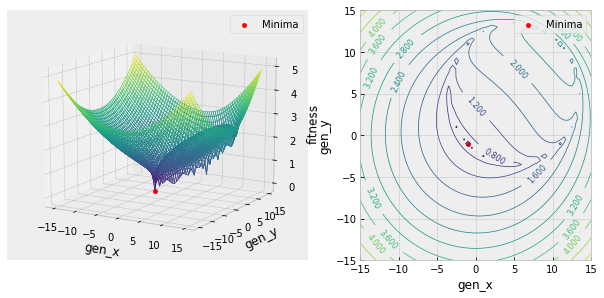

In [5]:
EA_plt_land(f, domain, point, grph_steps, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

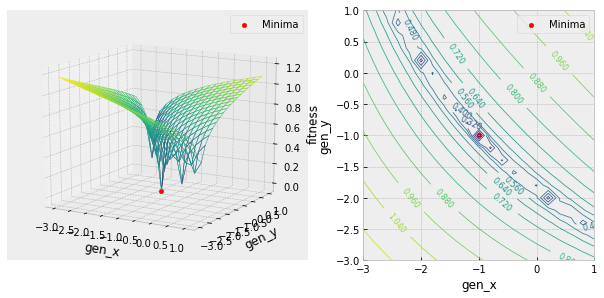

In [6]:
domain_min=(-3,1,-3,1)
EA_plt_land(f, domain_min, point, 21, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

# Running the Evolutionary Algorithm
## Setting the EA's parameters

In [7]:
#starting seed
np.random.seed(42)

In [8]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 50

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'fitness_proportional_selection'
par_s = 60

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'uniform'
### Mutation method, probability and size
mutation = 'random_all_gau_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='tournament_k3'

## We run the EA for 1 generation

In [9]:
%%time
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

Wall time: 1.96 s


In [10]:
z=gen_f
query = (genera_res['generation']==z)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
4000,0,50.0,2998.0,population,0.311329,0.690008,-2.294046
4001,0,50.0,2845.0,population,0.311329,0.690008,-2.294046
4002,0,50.0,2864.0,population,0.311329,0.690008,-2.294046
4003,0,50.0,2864.0,population,0.311329,0.690008,-2.294046
4004,0,50.0,2976.0,population,0.311329,0.690008,-2.294046
4005,0,50.0,2998.0,population,0.311329,0.690008,-2.294046
4006,0,50.0,2981.0,population,0.311329,0.690008,-2.294046
4007,0,50.0,3011.0,population,0.311329,0.690008,-2.294046
4008,0,50.0,3001.0,population,0.311329,0.690008,-2.294046
4009,0,50.0,2937.0,population,0.311329,0.690008,-2.294046


# Visualization
## Fitness development

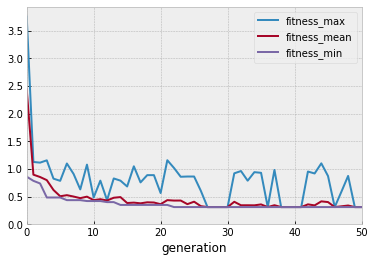

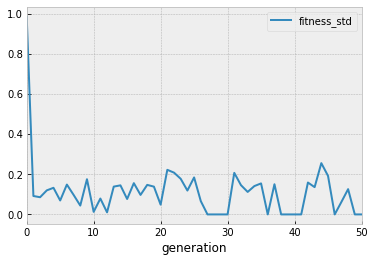

In [11]:
EA_fitn_dev(fitness_res, 0)

## Visualizing initial population and its progeny

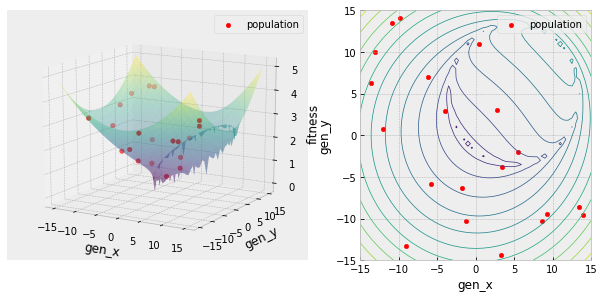

In [12]:
run_s=0  #First (and only) run
gen_s=0  #First generation
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

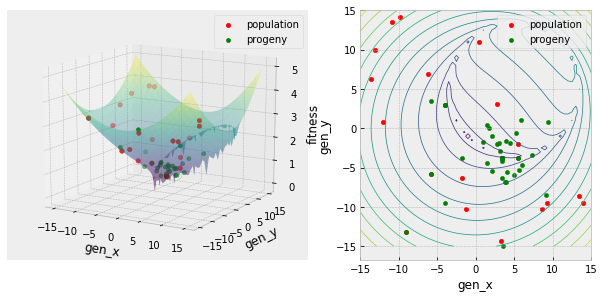

In [13]:
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

## Checking movement of population

In [14]:
run_s=0  #First (and only) run

Generation 0


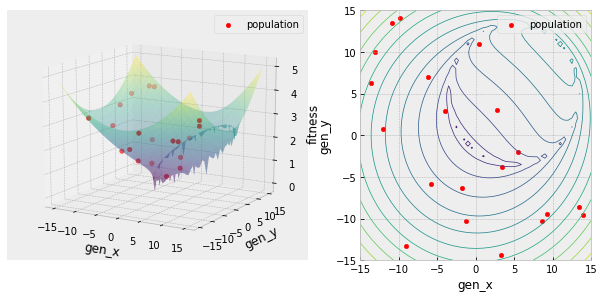

Generation 5


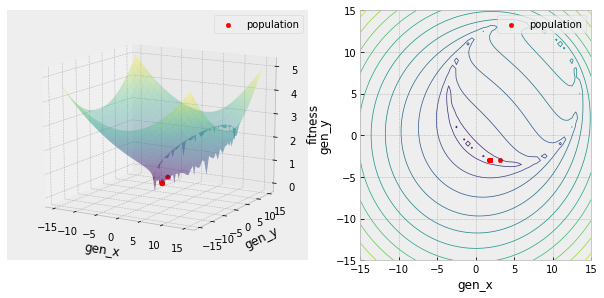

Generation 10


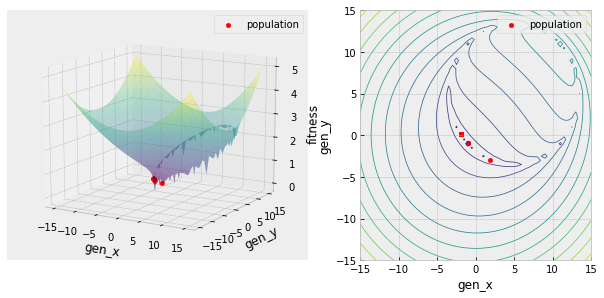

Generation 20


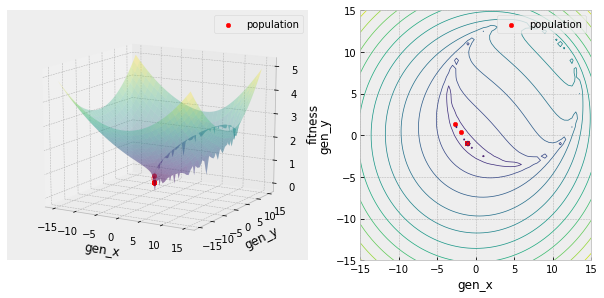

Generation 30


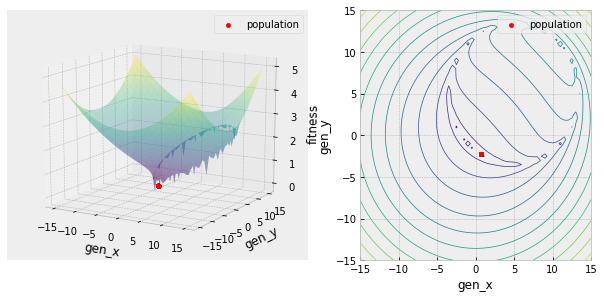

Generation 40


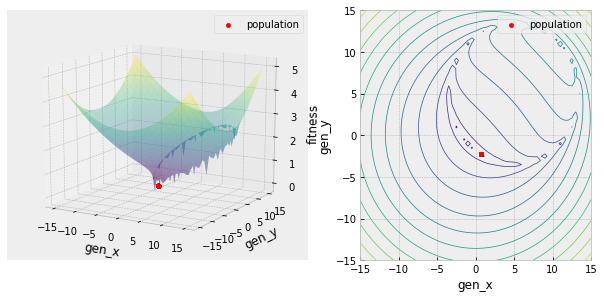

Generation 45


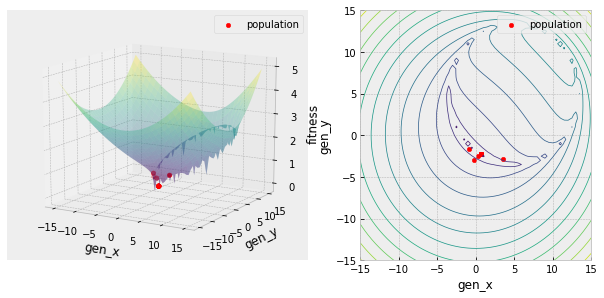

Generation 50


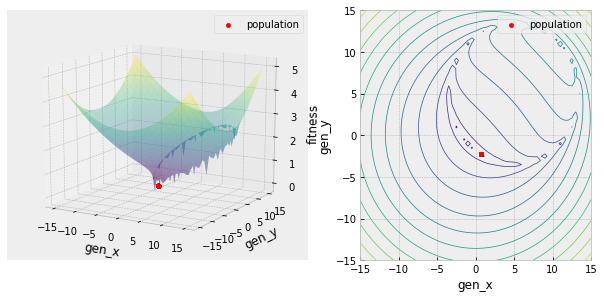

In [15]:
print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 50')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 50, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

Generation 0


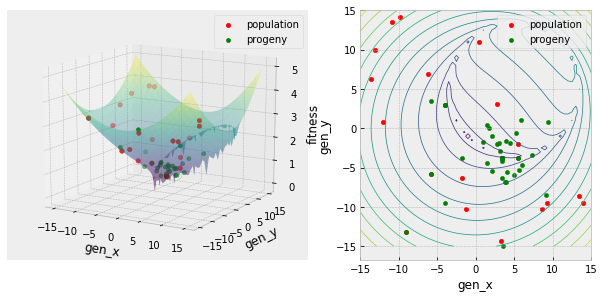

Generation 5


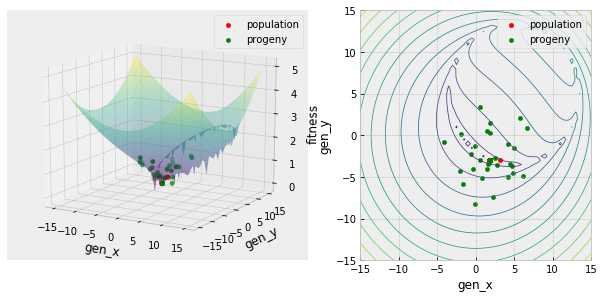

Generation 10


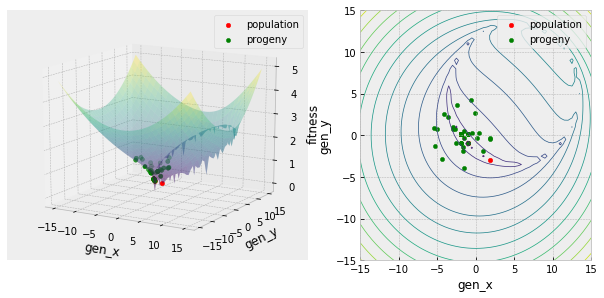

Generation 20


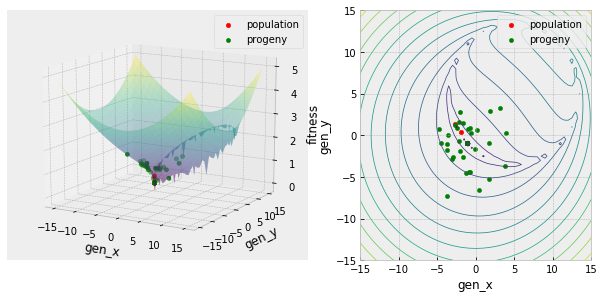

Generation 30


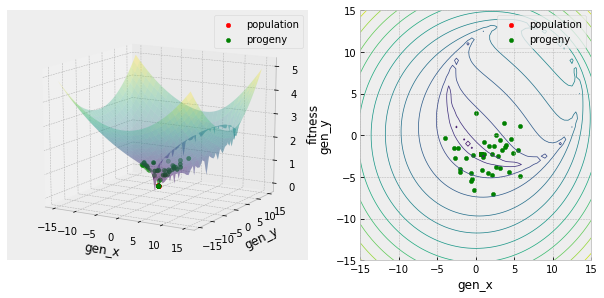

Generation 40


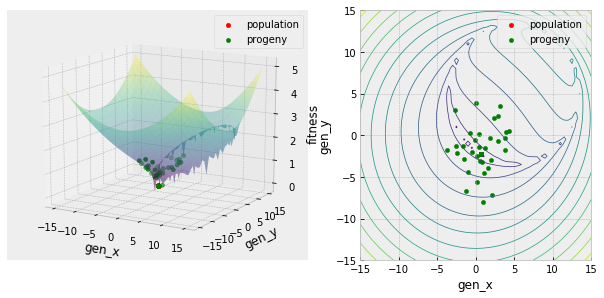

Generation 45


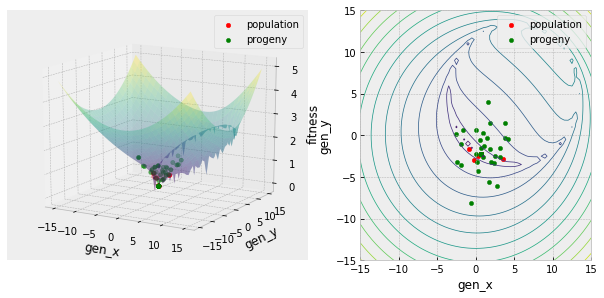

Generation 49


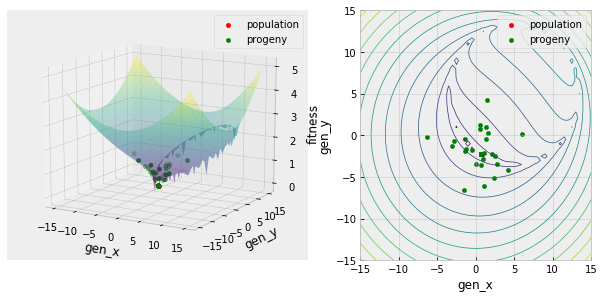

In [16]:
print('Generation 0')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 49')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 49, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [17]:
time_b = datetime.datetime.now()
print(time_b-time_a)

0:00:44.280371
